## Nur Anisah Fadhilah
## 202131020

## Import Library

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

## Import Dataset

In [2]:
data = pd.read_csv('K04_bank_customers.csv', sep=';') #read file                                       
data #show file data

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## EDA

In [3]:
#EDA (explanatory data analysis)

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [4]:
data.describe() #mendapatkan ringkasan statistik deskriptif

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


## Menampilkan Kolom Numerik

In [5]:
#identify dan menampilkan kolom-kolom numerik

numerical_features = [feature for feature in data.columns
                     if data [feature].dtypes !='O'] #mengidentifiasi fitur numerik
print("The length of Numerical_values is :", #menampilkan jumlah fitur numerik
     len(numerical_features))
data[numerical_features].head() #menampilkan data numerik pertama

The length of Numerical_values is : 7


,age,balance,day,duration,campaign,pdays,previous
0,58,2143,5,261,1,-1,0
1,44,29,5,151,1,-1,0
2,33,2,5,76,1,-1,0
3,47,1506,5,92,1,-1,0
4,33,1,5,198,1,-1,0


## Menampilkan Kolom Kategorikal

In [6]:
#identify dan menampilkan kolom-kolom kategorikal

categorical_features = [feature for feature in data.columns
                     if data [feature].dtypes =='O'] #mengindetifikasi fitur kategorikal
print("The length of Numerical_values is :", #menampilkan jumlah fitur kategorikal
     len(categorical_features))
data[categorical_features].head() #menampilkan data kategorikal pertama

The length of Numerical_values is : 10


,job,marital,education,default,housing,loan,contact,month,poutcome,y
0,management,married,tertiary,no,yes,no,unknown,may,unknown,no
1,technician,single,secondary,no,yes,no,unknown,may,unknown,no
2,entrepreneur,married,secondary,no,yes,yes,unknown,may,unknown,no
3,blue-collar,married,unknown,no,yes,no,unknown,may,unknown,no
4,unknown,single,unknown,no,no,no,unknown,may,unknown,no


In [7]:
#melihat kategori tiap data categorical

for i in categorical_features: #iterasi melalui kolom kategorikal
    print(data[i].unique()) #menampilkan nilai unik untuk setiap kolom kategorikal

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
['married' 'single' 'divorced']
['tertiary' 'secondary' 'unknown' 'primary']
['no' 'yes']
['yes' 'no']
['no' 'yes']
['unknown' 'cellular' 'telephone']
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
['unknown' 'failure' 'other' 'success']
['no' 'yes']


## Processing Data

In [8]:
#mengubah data kategori menjadi numerik
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

for feature in categorical_features: #iterasi melalui kolom kategorikal
    print(data[feature].unique()) #menampilkan nilai unik sebelum transformasi
    data[feature]=label_encoder.fit_transform(data[feature]) #menggunakan labelEncoder untuk transformasi
    print(data[feature].unique()) #menampilkan nilai unik setelah transformasi

['management' 'technician' 'entrepreneur' 'blue-collar' 'unknown'
 'retired' 'admin.' 'services' 'self-employed' 'unemployed' 'housemaid'
 'student']
[ 4  9  2  1 11  5  0  7  6 10  3  8]
['married' 'single' 'divorced']
[1 2 0]
['tertiary' 'secondary' 'unknown' 'primary']
[2 1 3 0]
['no' 'yes']
[0 1]
['yes' 'no']
[1 0]
['no' 'yes']
[0 1]
['unknown' 'cellular' 'telephone']
[2 0 1]
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 'jan' 'feb' 'mar' 'apr' 'sep']
[ 8  6  5  1 10  9  2  4  3  7  0 11]
['unknown' 'failure' 'other' 'success']
[3 0 1 2]
['no' 'yes']
[0 1]


In [9]:
data.head() #menampilkan 5 baris pertama DataFrame setelah transformasi 

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,4,1,2,0,2143,1,0,2,5,8,261,1,-1,0,3,0
1,44,9,2,1,0,29,1,0,2,5,8,151,1,-1,0,3,0
2,33,2,1,1,0,2,1,1,2,5,8,76,1,-1,0,3,0
3,47,1,1,3,0,1506,1,0,2,5,8,92,1,-1,0,3,0
4,33,11,2,3,0,1,0,0,2,5,8,198,1,-1,0,3,0


## Menyiapkan Data x dan y

In [10]:
#menyiapkan data x dan y
x = data.drop(['age', 'y'], axis = 1) #menghasilkan data x
y = data['y'] #menghasilkan data y

#menampilkan data x dan y
print (x)
print (y)

       job  marital  education  default  balance  housing  loan  contact  day  \
0        4        1          2        0     2143        1     0        2    5   
1        9        2          1        0       29        1     0        2    5   
2        2        1          1        0        2        1     1        2    5   
3        1        1          3        0     1506        1     0        2    5   
4       11        2          3        0        1        0     0        2    5   
...    ...      ...        ...      ...      ...      ...   ...      ...  ...   
45206    9        1          2        0      825        0     0        0   17   
45207    5        0          0        0     1729        0     0        0   17   
45208    5        1          1        0     5715        0     0        0   17   
45209    1        1          1        0      668        0     0        1   17   
45210    2        1          1        0     2971        0     0        0   17   

       month  duration  cam

## Split Data

In [11]:
#membagi dataset menjadi data latih dan data uji
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,
                                                    y,
                                                    test_size = 0.25,
                                                   random_state=0)
#cetak dimensi tiap variabel
print(f'x shape {x.shape}')
print(f'y shape {y.shape}')

print(f'x_train shape {x_train.shape}')
print(f'x_test shape {x_test.shape}')
print(f'y_train shape {y_train.shape}')
print(f'y_test shape {y_test.shape}')

x shape (45211, 15)
y shape (45211,)
x_train shape (33908, 15)
x_test shape (11303, 15)
y_train shape (33908,)
y_test shape (11303,)


## Pembuatan Model

In [12]:
#pembuatan model
from sklearn.naive_bayes import GaussianNB #import model
model = GaussianNB() #inisialisasi model
model.fit(x_train,y_train) # pelatihan model

GaussianNB()

## Data Testing

In [13]:
#proses testing
y_pred_train = model.predict(x_train) #prediksi pada data latih
y_pred_test = model.predict(x_test) #prediksi pada data uji

In [14]:
from sklearn.metrics import accuracy_score

hasil_prediksi = model.predict(x_test) #Melakukan prediksi pada data uji
print('Akurasi Model :', accuracy_score(y_test, hasil_prediksi)) #menampilkan hasil akurasi 

Akurasi Model : 0.8381845527735999


## Pengujian Model

In [15]:
#evaluasi model
from sklearn.metrics import confusion_matrix, classification_report

#Confusion Matrix dan Classification Report untuk Data Latih
print('evaluasi training:')
print(confusion_matrix(y_train, y_pred_train))
print(classification_report(y_train, y_pred_train))

#Confusion Matrix dan Classification Report untuk Data Uji
print('evaluasi testing:')
print(confusion_matrix(y_test, y_pred_test))
print(classification_report(y_test, y_pred_test))

evaluasi training:
[[26844  3100]
 [ 2247  1717]]
              precision    recall  f1-score   support

           0       0.92      0.90      0.91     29944
           1       0.36      0.43      0.39      3964

    accuracy                           0.84     33908
   macro avg       0.64      0.66      0.65     33908
weighted avg       0.86      0.84      0.85     33908

evaluasi testing:
[[8925 1053]
 [ 776  549]]
              precision    recall  f1-score   support

           0       0.92      0.89      0.91      9978
           1       0.34      0.41      0.38      1325

    accuracy                           0.84     11303
   macro avg       0.63      0.65      0.64     11303
weighted avg       0.85      0.84      0.84     11303



## Visualisasi Model

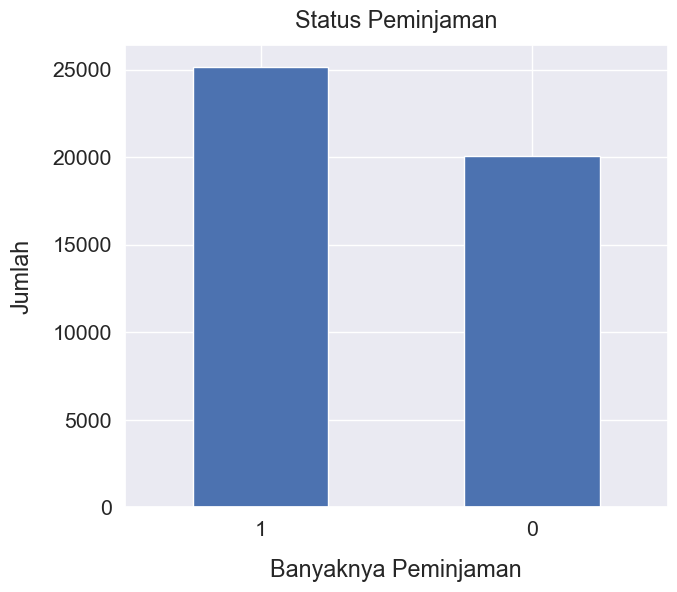

In [16]:
sns.set(font_scale=1.4)
data['housing'].value_counts().plot(kind='bar', figsize=(7, 6), rot=0)
plt.xlabel("Banyaknya Peminjaman", labelpad=14)
plt.ylabel("Jumlah", labelpad=14)
plt.title("Status Peminjaman", y=1.02);

## Cek Distribusi Class

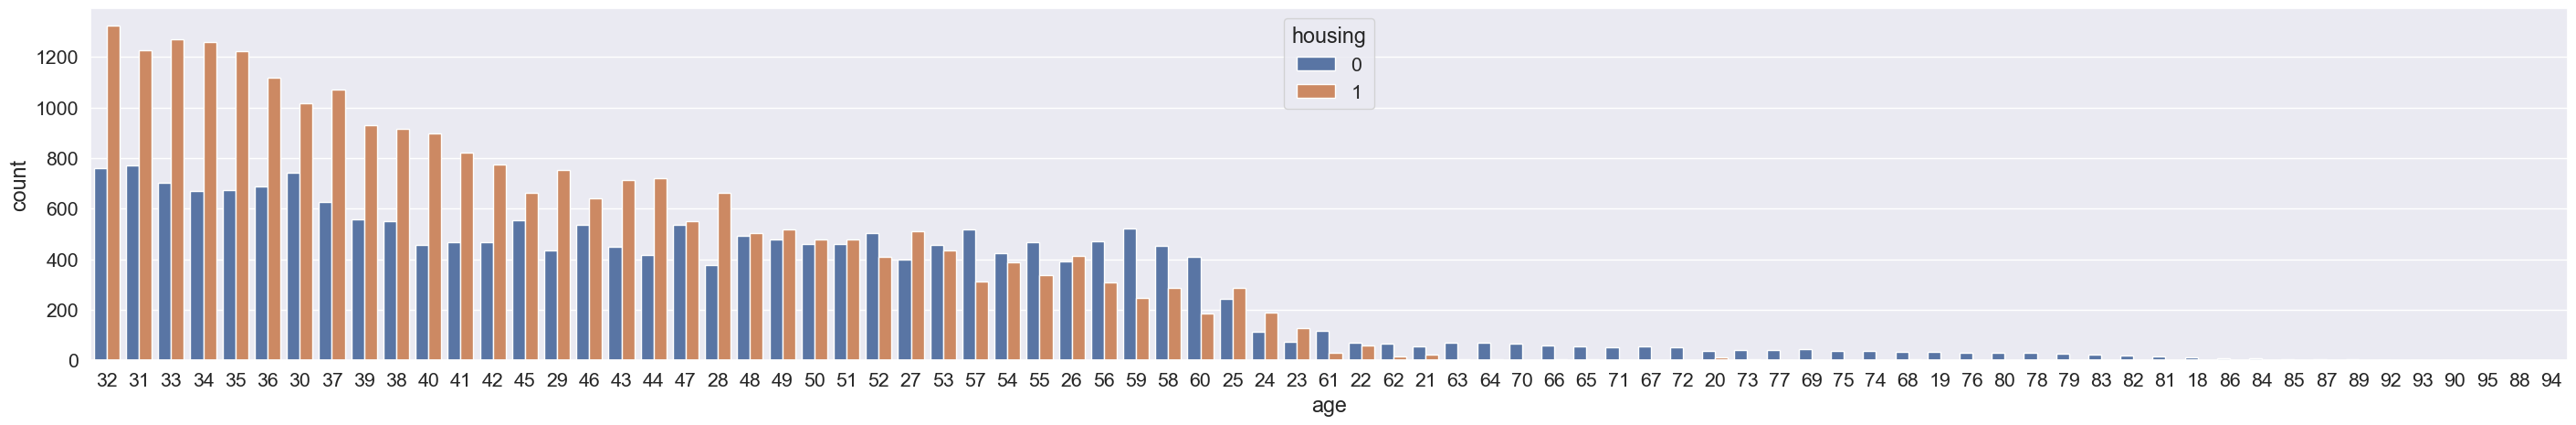

In [17]:
plt.subplots(figsize = (35,5))
sns.countplot(x=data['age'],order=data['age'].value_counts().index,hue=data['housing'])
plt.show()

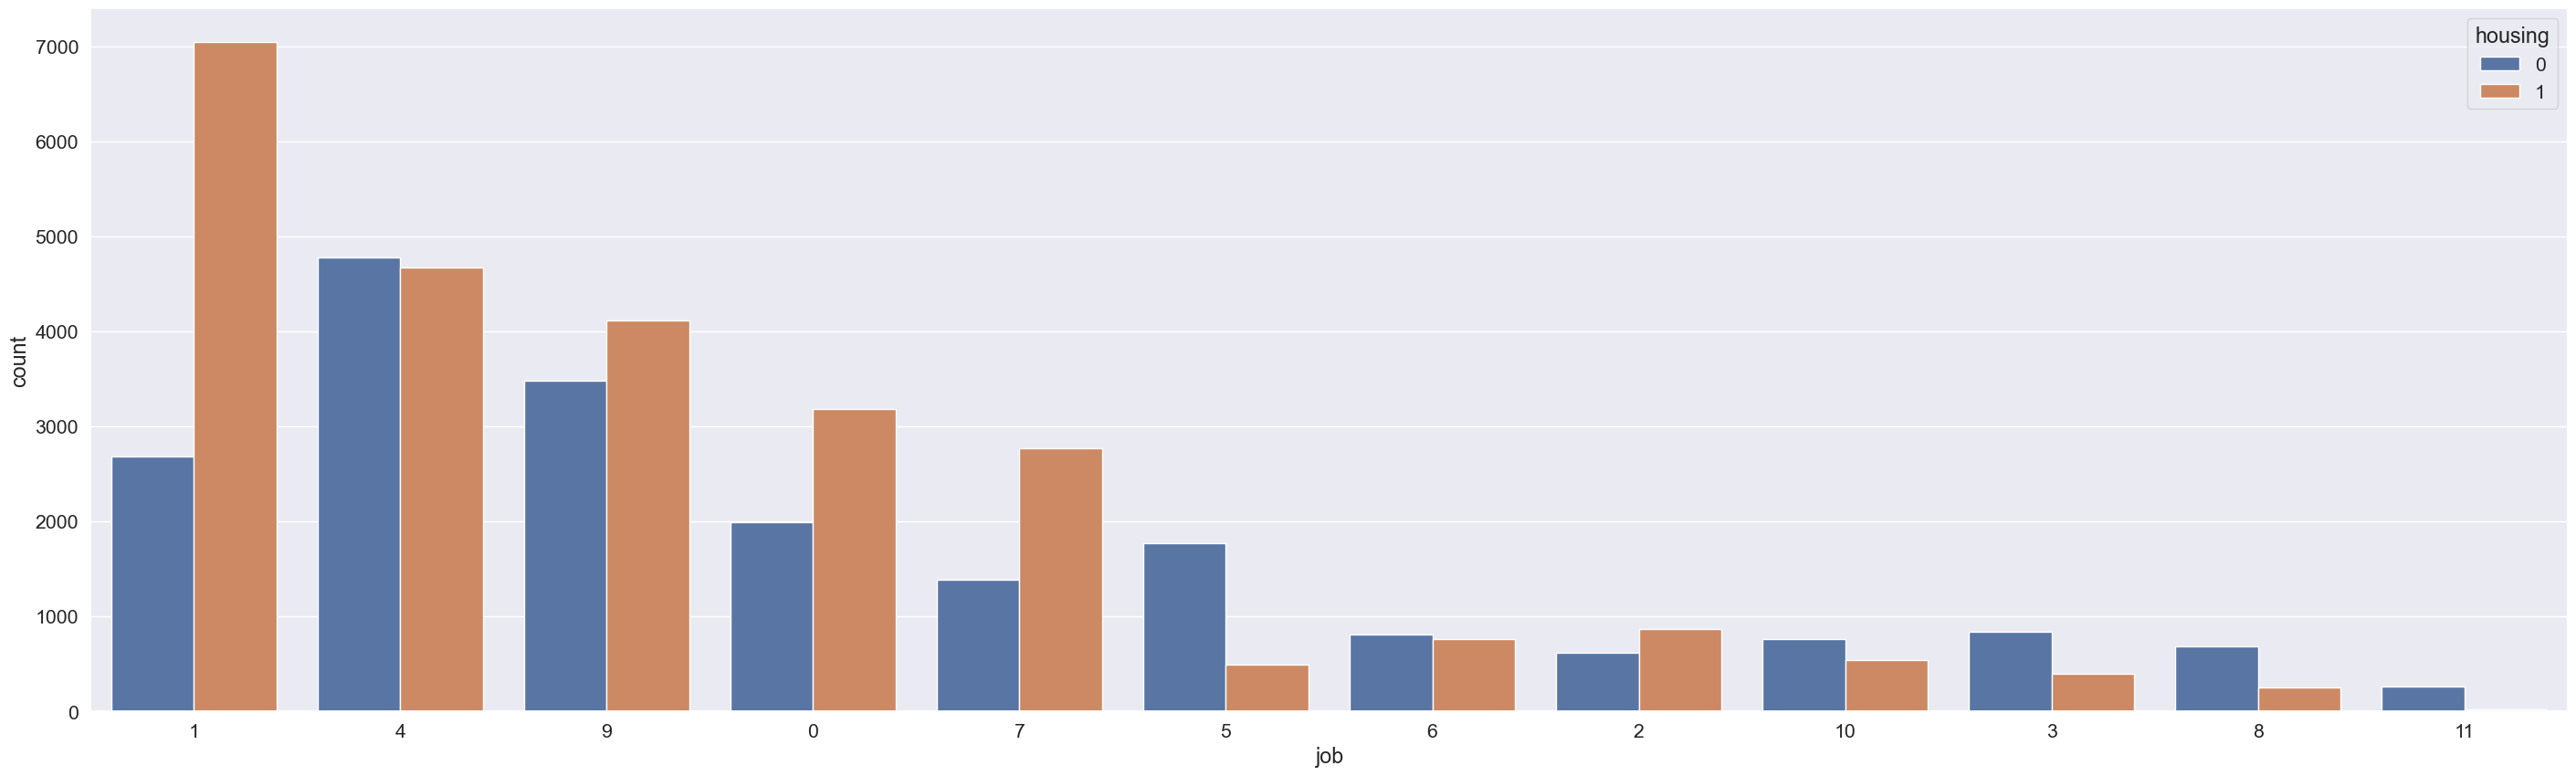

In [18]:
plt.subplots(figsize = (35,10))
sns.countplot(x=data['job'],order=data['job'].value_counts().index,hue=data['housing'])
plt.show()

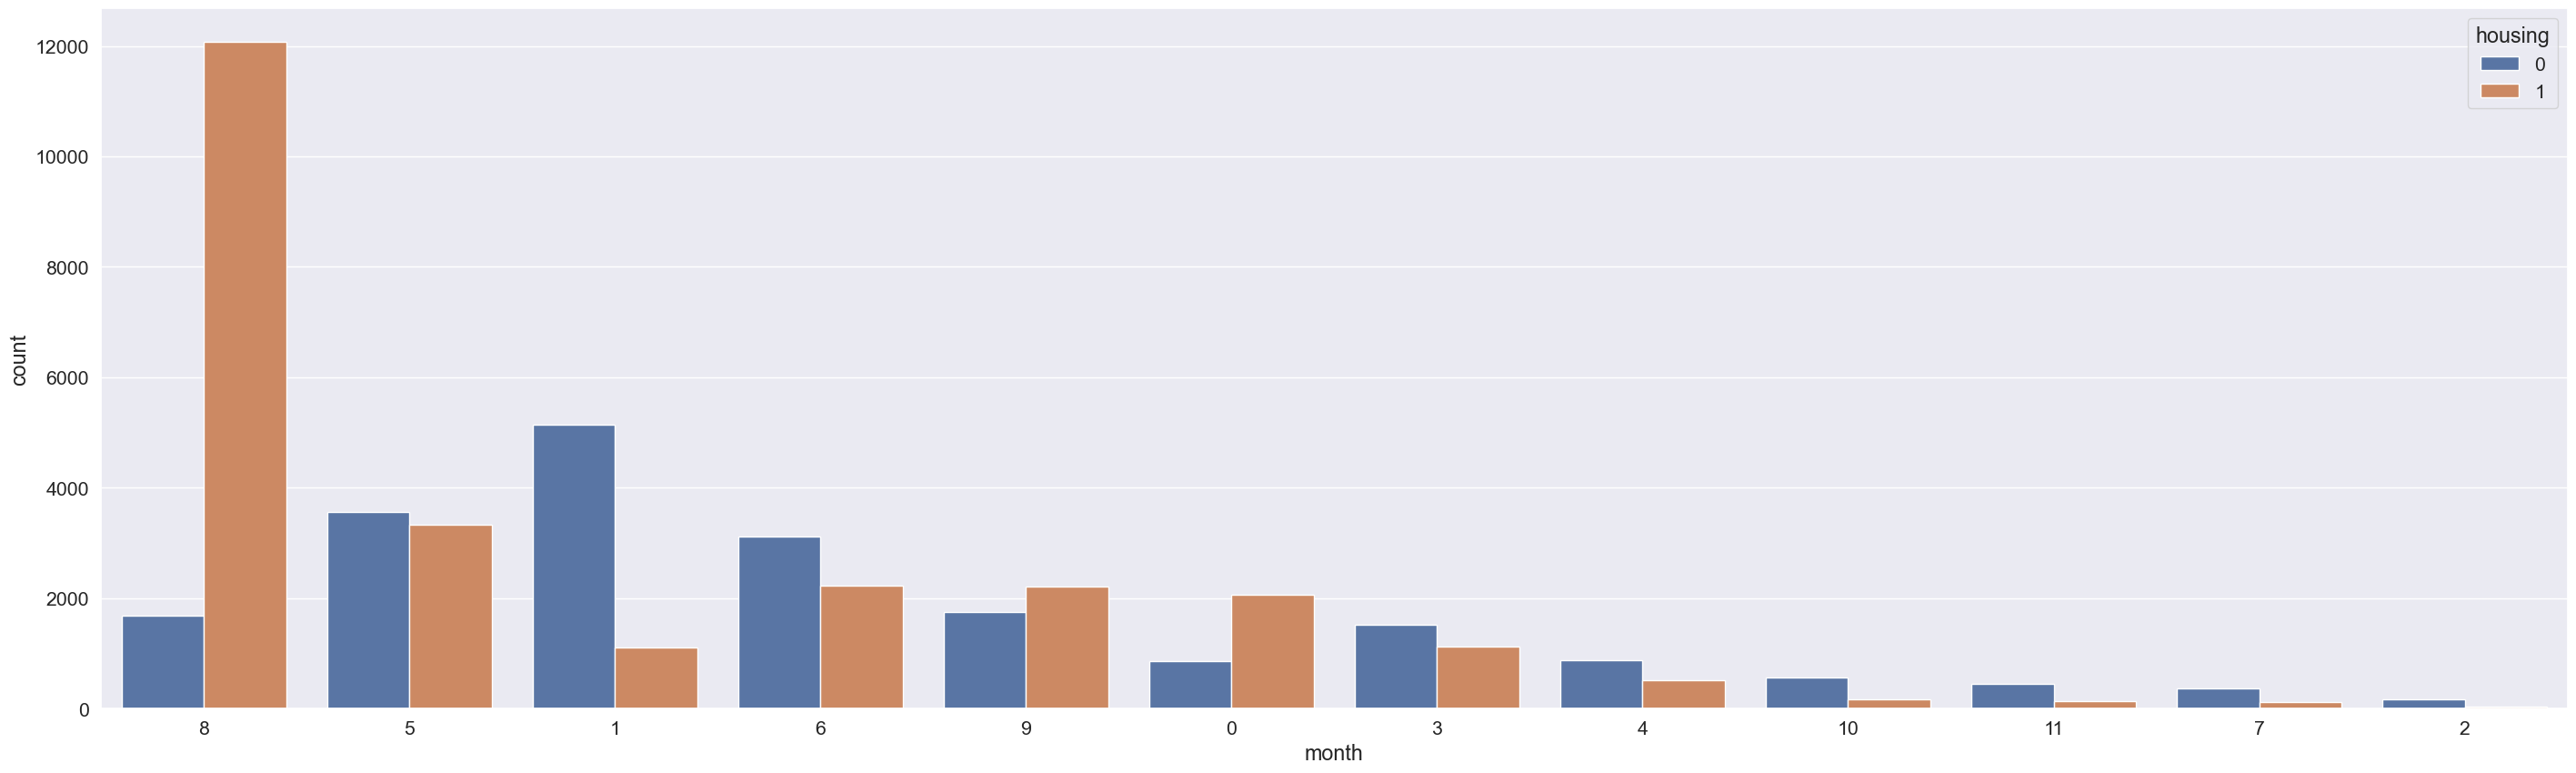

In [19]:
plt.subplots(figsize = (35,10))
sns.countplot(x=data['month'],order=data['month'].value_counts().index,hue=data['housing'])
plt.show()